In [1]:
import os
import numpy as np
np.seterr(divide = 'ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
pathDir = os.path.join(os.getcwd(), "DS1")

dataTrain = pd.read_csv(os.path.join(pathDir,"app_train.csv"))
dataTest = pd.read_csv(os.path.join(pathDir, "app_test.csv"))

In [3]:
dataTrain.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [4]:
# remove unidentified feature
dataTrain.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
dataTrain.drop(["a"], axis=1, inplace=True)

dataTest.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
dataTest.drop(["a"], axis=1, inplace=True)

In [5]:
# handling categorical features
# ====== get the names of categorcal features
categFeatures = dataTrain.select_dtypes(include='object').columns

In [7]:
# for feature in dataTrain.columns:
#     if feature == 'LN_ID':
#         continue
#     print(dataTrain[feature].value_counts())

# ====== handle data entry inconsistencies
for feature in categFeatures:
    uniqueData = dataTrain[feature].unique()
    print("Unique data from %s:\n" % (feature), uniqueData)
    print("=============================================")

Unique data from CONTRACT_TYPE:
 ['Revolving loans' 'Cash loans']
Unique data from GENDER:
 ['F' 'M']
Unique data from INCOME_TYPE:
 ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']
Unique data from EDUCATION:
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique data from FAMILY_STATUS:
 ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique data from HOUSING_TYPE:
 ['With parents' 'House / apartment' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']
Unique data from WEEKDAYS_APPLY:
 ['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'SUNDAY' 'MONDAY' 'FRIDAY' 'SATURDAY']
Unique data from ORGANIZATION_TYPE:
 ['Business Entity Type 3' 'Other' 'NA1' 'Culture' 'Construction'
 'Self-employed' 'University' 'Kindergarten' 'Business Entity Type 2'
 'Restaurant' 'Trade: type 3' 'Services' 'Housing'
 'Business Entity Type 1' 'Industry: type 9'

In [ ]:
# ====== #1 manually change its value
# dataTrain.CONTRACT_TYPE=dataTrain.CONTRACT_TYPE.map({'Cash loans':0,'Revolving loans':1})
# dataTrain.CONTRACT_TYPE.value_counts()

In [8]:
# ====== #2 change automatically with labelencoder
from sklearn.preprocessing import LabelEncoder

def replaceCategValues(data, categFeatures):
    lb = LabelEncoder()
    for feature in categFeatures:
        data[feature] = lb.fit_transform(data[feature])
    return data

In [9]:
dataTrain = replaceCategValues(dataTrain, categFeatures)
dataTest = replaceCategValues(dataTest, categFeatures)

Text(0.5, 1.0, 'Test Data')

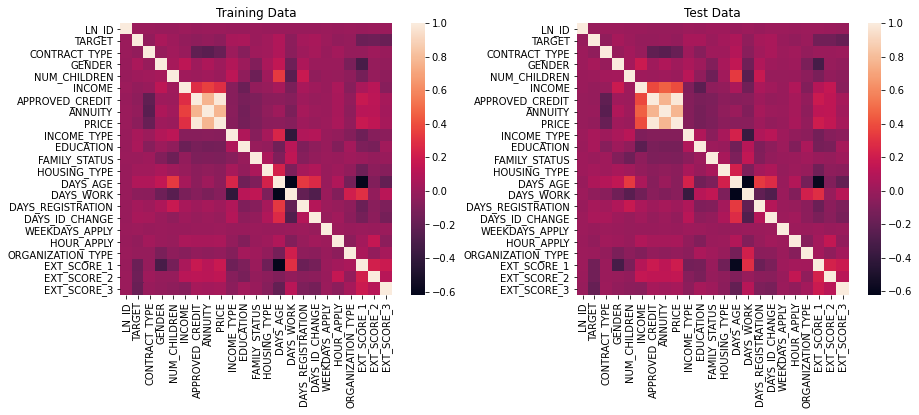

In [10]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize = (15, 5))
ax = axes.ravel()
g1 = sns.heatmap(dataTrain.corr(), square=True, ax=ax[0])
g1.set_title('Training Data')
g2 = sns.heatmap(dataTest.corr(), square=True, ax=ax[1])
g2.set_title('Test Data')
# plt.savefig("heatmap dataTrain.png")

In [11]:
# remove unnecessary features
# features = [
#     'GENDER', 'EDUCATION', 'FAMILY_STATUS', 'ORGANIZATION_TYPE',
#     'NUM_CHILDREN', 'HOUSING_TYPE', 'INCOME_TYPE',
#     'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION',
#     'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
#     'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
# ]

# dataTrain.drop(features, axis=1, inplace=True)
# dataTest.drop(features, axis=1, inplace=True)

In [12]:
# handle missing values
def checkNullData(data):
    isnullData = data.isnull()
    for fitur in isnullData.keys():
        print(isnullData[fitur].value_counts())
checkNullData(dataTrain)

False    61503
Name: LN_ID, dtype: int64
False    61503
Name: TARGET, dtype: int64
False    61503
Name: CONTRACT_TYPE, dtype: int64
False    61503
Name: GENDER, dtype: int64
False    61503
Name: NUM_CHILDREN, dtype: int64
False    61503
Name: INCOME, dtype: int64
False    61503
Name: APPROVED_CREDIT, dtype: int64
False    61502
True         1
Name: ANNUITY, dtype: int64
False    61441
True        62
Name: PRICE, dtype: int64
False    61503
Name: INCOME_TYPE, dtype: int64
False    61503
Name: EDUCATION, dtype: int64
False    61503
Name: FAMILY_STATUS, dtype: int64
False    61503
Name: HOUSING_TYPE, dtype: int64
False    61503
Name: DAYS_AGE, dtype: int64
False    61503
Name: DAYS_WORK, dtype: int64
False    61503
Name: DAYS_REGISTRATION, dtype: int64
False    61503
Name: DAYS_ID_CHANGE, dtype: int64
False    61503
Name: WEEKDAYS_APPLY, dtype: int64
False    61503
Name: HOUR_APPLY, dtype: int64
False    61503
Name: ORGANIZATION_TYPE, dtype: int64
True     34845
False    26658
Name: EXT_S

In [13]:
# ====== fill missing falue with mean of each feature
dataTrain.fillna(dataTrain.mean() , inplace=True)
dataTest.fillna(dataTest.mean(), inplace=True)

Text(0.5, 1.0, 'Test Data')

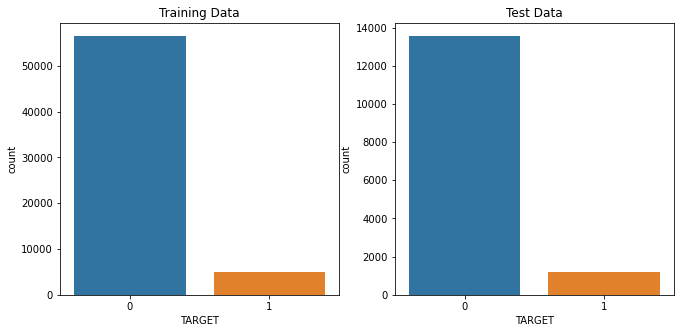

In [14]:
# handle imbalanced data

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
ax = axes.ravel()

g1 = sns.countplot(dataTrain.TARGET, ax=ax[0])
g2 = sns.countplot(dataTest.TARGET, ax=ax[1])

g1.set_title("Training Data")
g2.set_title("Test Data")

In [15]:
#  ====== random under-sampling
def randUnderSampling(data, targetColumn):
    targetCount = data[targetColumn].value_counts()
    for i in targetCount.index:
        if targetCount[i] == min(targetCount):
            continue
        print('Abundant class {} = {}'.format(targetCount.index[i], targetCount[i]))
        frac = min(targetCount)/targetCount[i]
        abundantClass = data[data[targetColumn] == i]
        index = abundantClass.sample(frac=1-frac, random_state=0).index
        data.drop(index, inplace=True)
    print('\nRandom Under-Sampling:')
    print(data[targetColumn].value_counts())
    return data

In [16]:
dataTrain = randUnderSampling(dataTrain, targetColumn="TARGET")
# dataTest = randUnderSampling(dataTest, targetColumn="TARGET")

Abundant class 0 = 56534

Random Under-Sampling:
1    4969
0    4969
Name: TARGET, dtype: int64


In [17]:
y = dataTrain.TARGET
X = dataTrain.drop(["TARGET", "LN_ID"], axis=1)

In [18]:
# handle data range
# ====== scaling minmax
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)
scaledX = pd.DataFrame(scaledX, columns=X.columns)

In [19]:
import math
def plotDataDistribute(data):
    row = math.ceil(len(data.columns)/4)

    plt.figure(1, figsize=(15, 15), tight_layout=True)
    for feature, i in zip(data.columns, range(len(data.columns))):
        ax = plt.subplot(row, 4, i+1)
        sns.distplot(data[feature], ax=ax)
        ax.set_title(feature)

Plot Original Data Train


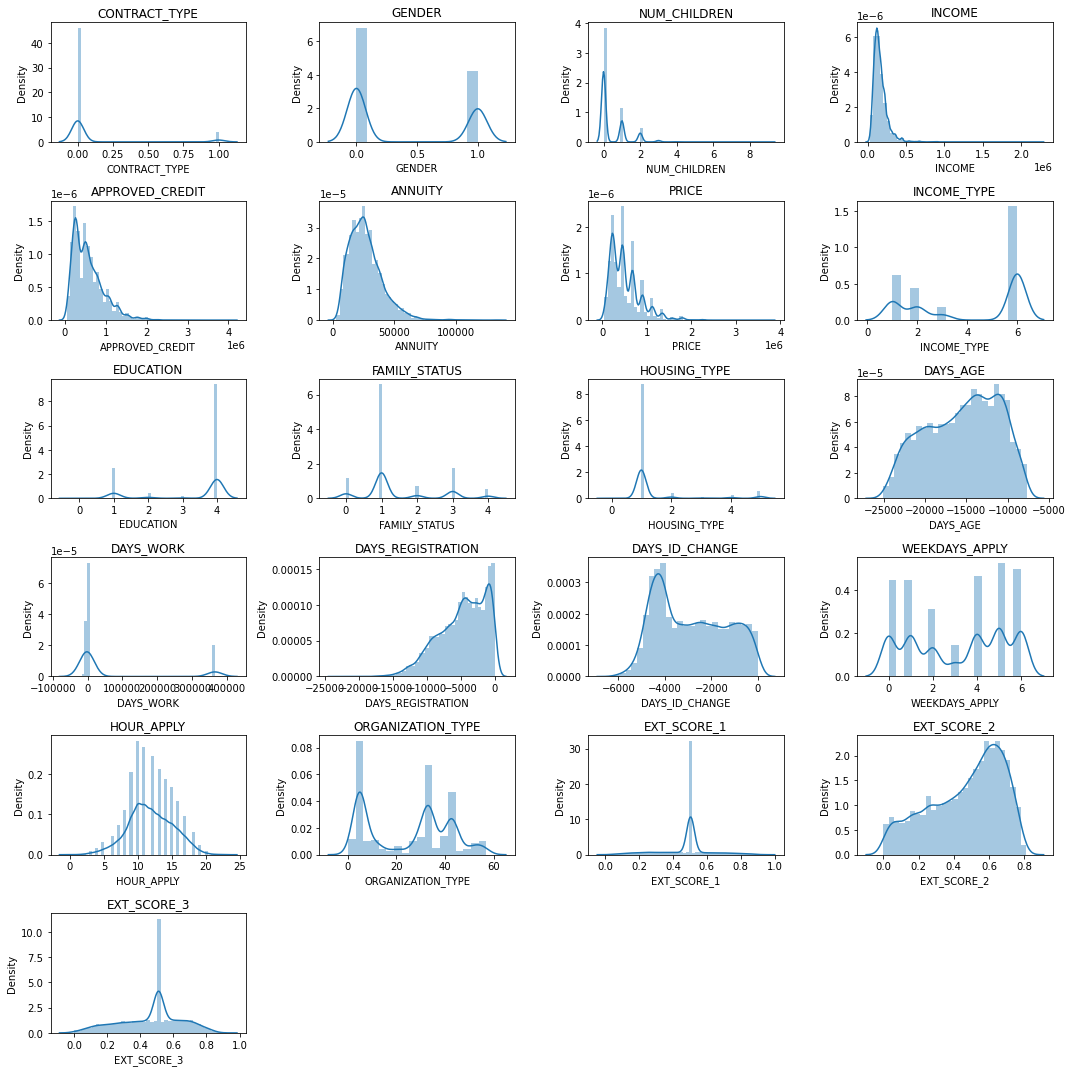

In [20]:
print("Plot Original Data Train")
plotDataDistribute(X)

Plot Scaled Data Train


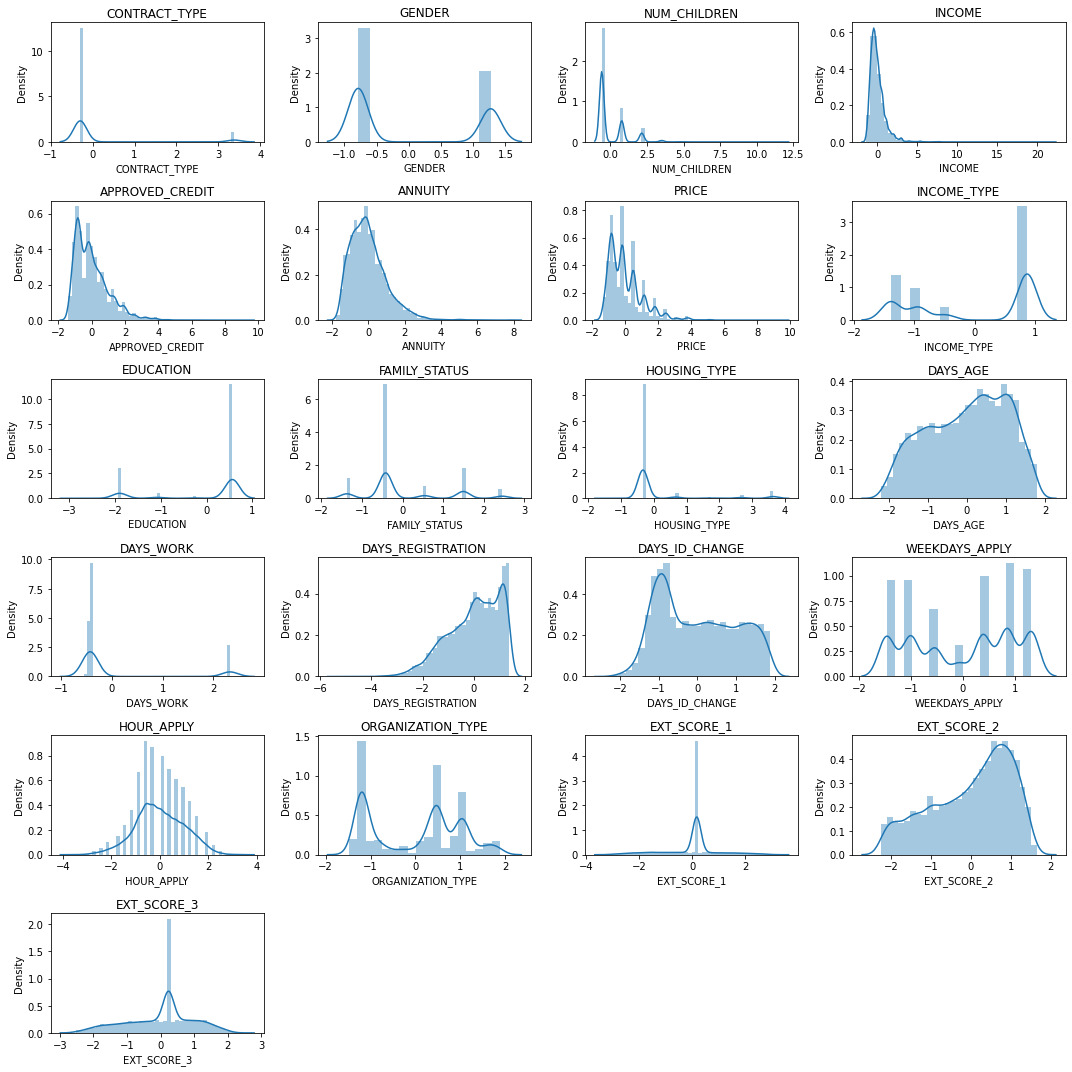

In [21]:
print("Plot Scaled Data Train")
plotDataDistribute(scaledX)

In [22]:
# ====== normalize data
# from scipy import stats
# normalized_X = stats.boxcox(scaledX[])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
	scaledX, y, test_size=0.25, random_state=128)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [25]:
models=[]
models.append(("logreg",LogisticRegression(solver='liblinear', class_weight='balanced')))
models.append(("tree",DecisionTreeClassifier(class_weight="balanced", random_state=42)))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC(class_weight="balanced", random_state=42)))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))
# models.append(("gpc",GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=0)))

In [26]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]
seed=128
scoring='accuracy'

In [27]:
for name,model in models:
    #print(model)
    kfold = KFold(n_splits=20, random_state=seed)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("model %s\t: %.2f accuracy with a std. of %.2f" % (
        name,
        cv_result.mean(),
        cv_result.std()
    ))

model logreg	: 0.68 accuracy with a std. of 0.02
model tree	: 0.58 accuracy with a std. of 0.02
model lda	: 0.68 accuracy with a std. of 0.02
model svc	: 0.68 accuracy with a std. of 0.02
model knn	: 0.61 accuracy with a std. of 0.03
model nb	: 0.65 accuracy with a std. of 0.02


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
for name, model in models:
    svc = model
    svc.fit(X_train, y_train)
    pred = svc.predict(X_val)
    print(name, ":\n")
    print("Accuracy Score = {:.2f}".format(accuracy_score(y_val, pred)))
    print("Confusion matrix = \n{}".format(confusion_matrix(y_val, pred)))
    print(classification_report(y_val, pred))
    print("\n======================================================\n")

logreg :

Accuracy Score = 0.66
Confusion matrix = 
[[859 380]
 [462 784]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1239
           1       0.67      0.63      0.65      1246

    accuracy                           0.66      2485
   macro avg       0.66      0.66      0.66      2485
weighted avg       0.66      0.66      0.66      2485



tree :

Accuracy Score = 0.57
Confusion matrix = 
[[713 526]
 [540 706]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1239
           1       0.57      0.57      0.57      1246

    accuracy                           0.57      2485
   macro avg       0.57      0.57      0.57      2485
weighted avg       0.57      0.57      0.57      2485



lda :

Accuracy Score = 0.66
Confusion matrix = 
[[864 375]
 [461 785]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1239
           1 

In [30]:
# Predicting data_test with models

X_test = dataTest.drop(["LN_ID", "TARGET"], axis=1)
y_test = dataTest["TARGET"]

In [31]:
predOutput = pd.DataFrame()
predOutput["LN_ID"] = dataTest.LN_ID

In [32]:
scaledX_test = scaler.transform(X_test)
scaledX_test = pd.DataFrame(scaledX_test, columns=X_test.columns)

In [33]:
for name, model in models:
    svc = model
    svc.fit(X_train, y_train)
    pred = svc.predict(X_test).astype(int)
    predOutput[name] = pred
    print(name, ":\n")
    print("Accuracy Score = {:.2f}".format(accuracy_score(y_test, pred)))
    print("Confusion matrix = \n{}".format(confusion_matrix(y_test, pred)))
    print(classification_report(y_test, pred))
    print("\n======================================================\n")

logreg :

Accuracy Score = 0.73
Confusion matrix = 
[[10432  3126]
 [  799   404]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     13558
           1       0.11      0.34      0.17      1203

    accuracy                           0.73     14761
   macro avg       0.52      0.55      0.51     14761
weighted avg       0.86      0.73      0.79     14761



tree :

Accuracy Score = 0.35
Confusion matrix = 
[[4385 9173]
 [ 451  752]]
              precision    recall  f1-score   support

           0       0.91      0.32      0.48     13558
           1       0.08      0.63      0.14      1203

    accuracy                           0.35     14761
   macro avg       0.49      0.47      0.31     14761
weighted avg       0.84      0.35      0.45     14761



lda :

Accuracy Score = 0.72
Confusion matrix = 
[[10266  3292]
 [  777   426]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83    

In [34]:
predOutput = predOutput.merge(dataTest[['LN_ID', 'TARGET']], how='left', on="LN_ID")
print(predOutput.shape)
predOutput.dropna()

(14761, 8)


,LN_ID,logreg,tree,lda,svc,knn,nb,TARGET
0,219092,0,0,0,1,0,0,0
1,141577,0,0,0,1,0,0,0
2,180205,0,1,0,1,0,0,0
3,357381,1,1,1,1,0,0,0
4,271229,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
14756,144293,0,1,0,1,0,0,0
14757,272093,0,1,0,1,0,0,1
14758,251117,1,0,1,1,0,0,0
14759,334313,0,1,0,1,0,0,0


In [35]:
for model in predOutput.columns:
    if model == 'LN_ID':
        continue
    print(predOutput[model].value_counts())

0    11231
1     3530
Name: logreg, dtype: int64
1    9925
0    4836
Name: tree, dtype: int64
0    11043
1     3718
Name: lda, dtype: int64
1    14761
Name: svc, dtype: int64
0    14761
Name: knn, dtype: int64
0    14761
Name: nb, dtype: int64
0    13558
1     1203
Name: TARGET, dtype: int64
